## Customer Segmentation for Cannondale bikes 

- k-means clustering will be used to segment customers into distinct groups based on purchasing habits.
- The k-means clustering algorithm works by finding like groups based on Euclidean distance, a measure of distance or similarity. The practitioner selects k groups to cluster, and the algorithm finds the best centroids for the k groups. 
- Those groups can be used to determine which factors group members relate. For customers, these would be their buying preferences.
- Datasets: Cannondale bikes data set

### Step1: Data preprocessing

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

%matplotlib inline
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'

import operator
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

In [2]:
customers = pd.read_excel("bikeshops.xlsx")
products = pd.read_excel("bikes.xlsx")
orders = pd.read_excel("orders.xlsx")
print('=' *50)
print("Shape of orders:" + str(orders.shape))
display(orders.head(3))
print('=' *50)
print("Shape of customers:" + str(customers.shape))
display(customers.head(3))
print('=' *50)
print("Shape of products:" + str(products.shape))
display(products.head(3))

Shape of orders:(15644, 7)


,Unnamed: 0,order.id,order.line,order.date,customer.id,product.id,quantity
0,1,1,1,2011-01-07,2,48,1
1,2,1,2,2011-01-07,2,52,1
2,3,2,1,2011-01-10,10,76,1


Shape of customers:(30, 6)


,bikeshop.id,bikeshop.name,bikeshop.city,bikeshop.state,latitude,longitude
0,1,Pittsburgh Mountain Machines,Pittsburgh,PA,40.440625,-79.995886
1,2,Ithaca Mountain Climbers,Ithaca,NY,42.443961,-76.501881
2,3,Columbus Race Equipment,Columbus,OH,39.961176,-82.998794


Shape of products:(97, 6)


,bike.id,model,category1,category2,frame,price
0,1,Supersix Evo Black Inc.,Road,Elite Road,Carbon,12790
1,2,Supersix Evo Hi-Mod Team,Road,Elite Road,Carbon,10660
2,3,Supersix Evo Hi-Mod Dura Ace 1,Road,Elite Road,Carbon,7990


     Q: Next, convert the unit price to categorical high/low variables. To do this, you can divide the unit prices into two halves using the median as the split point.

In [3]:
price_median = products['price'].median()
print('=' *50)
print("The median of the price is:" + str(price_median))
products['price'] = products['price'].apply(lambda x: 'High' if x >= price_median else 'Low' )

The median of the price is:3200.0


    Q: Then, you will load all three dataset (products, orders, and customers) and merge them together into one single data frame for further analysis. Remember, you can link the three datasets together by using the product.id and customer.id in the orders table.

In [4]:
orders_extended0 = orders.merge(products, how='inner', left_on= 'product.id', right_on='bike.id').merge(customers, how ='inner',left_on = 'customer.id', right_on = 'bikeshop.id')
orders_extended = orders_extended0.copy()
print('=' *50)
print(orders_extended.shape)
orders_extended.head()

(15644, 19)


,Unnamed: 0,order.id,order.line,order.date,customer.id,product.id,quantity,bike.id,model,category1,category2,frame,price,bikeshop.id,bikeshop.name,bikeshop.city,bikeshop.state,latitude,longitude
0,1,1,1,2011-01-07,2,48,1,48,Jekyll Carbon 2,Mountain,Over Mountain,Carbon,High,2,Ithaca Mountain Climbers,Ithaca,NY,42.443961,-76.501881
1,1002,132,6,2011-05-13,2,48,1,48,Jekyll Carbon 2,Mountain,Over Mountain,Carbon,High,2,Ithaca Mountain Climbers,Ithaca,NY,42.443961,-76.501881
2,3831,507,2,2012-06-26,2,48,1,48,Jekyll Carbon 2,Mountain,Over Mountain,Carbon,High,2,Ithaca Mountain Climbers,Ithaca,NY,42.443961,-76.501881
3,3991,528,18,2012-07-16,2,48,1,48,Jekyll Carbon 2,Mountain,Over Mountain,Carbon,High,2,Ithaca Mountain Climbers,Ithaca,NY,42.443961,-76.501881
4,5359,691,13,2013-02-05,2,48,1,48,Jekyll Carbon 2,Mountain,Over Mountain,Carbon,High,2,Ithaca Mountain Climbers,Ithaca,NY,42.443961,-76.501881


    Q: Spread the customers by quantity of bike models purchased. To do this, you can group the data by model & model features (bikeshop.name', 'model', 'category1', 'category2', 'frame', 'price') and summarize by quantity purchased. Then, you can use a pivot table to allocate the aggregated quantitties across different bikeshops. 

In [5]:
customer_trend = pd.pivot_table(orders_extended,index=['model', 'category1', 'category2', 'frame', 'price'],
               values=['order.id'],
               aggfunc='count',fill_value=0,
               columns=["bikeshop.name"]
                      )
customer_trend.columns = customer_trend.columns.levels[1]
print('=' *50)
print(customer_trend.shape)
customer_trend.head()

(97, 30)


,,,,bikeshop.name,Albuquerque Cycles,Ann Arbor Speed,Austin Cruisers,Cincinnati Speed,Columbus Race Equipment,Dallas Cycles,Denver Bike Shop,Detroit Cycles,Indianapolis Velocipedes,Ithaca Mountain Climbers,...,Philadelphia Bike Shop,Phoenix Bi-peds,Pittsburgh Mountain Machines,Portland Bi-peds,Providence Bi-peds,San Antonio Bike Shop,San Francisco Cruisers,Seattle Race Equipment,Tampa 29ers,Wichita Speed
model,category1,category2,frame,price,,,,,,,,,,,,,,,,,,,,,
Bad Habit 1,Mountain,Trail,Aluminum,High,3,4,1,2,4,3,22,5,2,20,...,4,15,5,7,5,3,1,2,4,3
Bad Habit 2,Mountain,Trail,Aluminum,Low,2,6,1,0,0,4,30,7,1,9,...,1,17,1,4,11,0,1,1,0,0
Beast of the East 1,Mountain,Trail,Aluminum,Low,3,7,2,0,0,1,29,5,2,16,...,0,15,2,4,5,1,0,2,2,0
Beast of the East 2,Mountain,Trail,Aluminum,Low,2,5,2,0,1,1,28,3,2,16,...,0,18,3,4,8,2,1,3,3,1
Beast of the East 3,Mountain,Trail,Aluminum,Low,1,2,0,0,1,1,31,5,0,11,...,5,18,1,9,4,3,0,1,2,0


       Q: Last, we need to scale (normalize) the quantity data. Unadjusted quantities presents a problem to the k-means algorithm. Some customers are larger than others meaning they purchase higher volumes. Fortunately, we can resolve this issue by converting the customer order quantities to proportion of the total bikes purchased by a customer.

In [6]:
# column-wise pct
for column in customer_trend.columns:
    customer_trend[column] = customer_trend[column].transform(lambda x: x/x.sum(axis = 0))
    
customer_trend.head()     

,,,,bikeshop.name,Albuquerque Cycles,Ann Arbor Speed,Austin Cruisers,Cincinnati Speed,Columbus Race Equipment,Dallas Cycles,Denver Bike Shop,Detroit Cycles,Indianapolis Velocipedes,Ithaca Mountain Climbers,...,Philadelphia Bike Shop,Phoenix Bi-peds,Pittsburgh Mountain Machines,Portland Bi-peds,Providence Bi-peds,San Antonio Bike Shop,San Francisco Cruisers,Seattle Race Equipment,Tampa 29ers,Wichita Speed
model,category1,category2,frame,price,,,,,,,,,,,,,,,,,,,,,
Bad Habit 1,Mountain,Trail,Aluminum,High,0.014493,0.008677,0.005208,0.006711,0.013514,0.016484,0.012215,0.013405,0.008658,0.020513,...,0.020942,0.013812,0.017986,0.014141,0.011521,0.020690,0.00339,0.018519,0.026316,0.007833
Bad Habit 2,Mountain,Trail,Aluminum,Low,0.009662,0.013015,0.005208,0.000000,0.000000,0.021978,0.016657,0.018767,0.004329,0.009231,...,0.005236,0.015654,0.003597,0.008081,0.025346,0.000000,0.00339,0.009259,0.000000,0.000000
Beast of the East 1,Mountain,Trail,Aluminum,Low,0.014493,0.015184,0.010417,0.000000,0.000000,0.005495,0.016102,0.013405,0.008658,0.016410,...,0.000000,0.013812,0.007194,0.008081,0.011521,0.006897,0.00000,0.018519,0.013158,0.000000
Beast of the East 2,Mountain,Trail,Aluminum,Low,0.009662,0.010846,0.010417,0.000000,0.003378,0.005495,0.015547,0.008043,0.008658,0.016410,...,0.000000,0.016575,0.010791,0.008081,0.018433,0.013793,0.00339,0.027778,0.019737,0.002611
Beast of the East 3,Mountain,Trail,Aluminum,Low,0.004831,0.004338,0.000000,0.000000,0.003378,0.005495,0.017213,0.013405,0.000000,0.011282,...,0.026178,0.016575,0.003597,0.018182,0.009217,0.020690,0.00000,0.009259,0.013158,0.000000


### Step 2: Perform k-Means Clustering
    Q: Clearly state your choice of the parameter k and your assumption behind choosing a specific k parameter. How many clusters do you think there should be and why?

- k-means package from the scikit-learn library is used.
- The cluster range I choose is from **4 to 8**.    
- The underlying assumption is the customer base are most likely to be at least 4 groups; out of features category 1, 2, frame and price, mountain bike vs. road bike and premium vs affordable preferences are the most important factors. 
- Max number of clusters is limited to 8 to avoid overfitting the segments. 


In [7]:
# The data frame is transposed to have the customers as rows and models as columns.
customer_trend1 = customer_trend.copy()
X = customer_trend1.T
print(X.shape)
X.head()

(30, 97)


model,Bad Habit 1,Bad Habit 2,Beast of the East 1,Beast of the East 2,Beast of the East 3,CAAD Disc Ultegra,CAAD12 105,CAAD12 Black Inc,CAAD12 Disc 105,CAAD12 Disc Dura Ace,...,Synapse Sora,Trail 1,Trail 2,Trail 3,Trail 4,Trail 5,Trigger Carbon 1,Trigger Carbon 2,Trigger Carbon 3,Trigger Carbon 4
category1,Mountain,Mountain,Mountain,Mountain,Mountain,Road,Road,Road,Road,Road,...,Road,Mountain,Mountain,Mountain,Mountain,Mountain,Mountain,Mountain,Mountain,Mountain
category2,Trail,Trail,Trail,Trail,Trail,Elite Road,Elite Road,Elite Road,Elite Road,Elite Road,...,Endurance Road,Sport,Sport,Sport,Sport,Sport,Over Mountain,Over Mountain,Over Mountain,Over Mountain
frame,Aluminum,Aluminum,Aluminum,Aluminum,Aluminum,Aluminum,Aluminum,Aluminum,Aluminum,Aluminum,...,Aluminum,Aluminum,Aluminum,Aluminum,Aluminum,Aluminum,Carbon,Carbon,Carbon,Carbon
price,High,Low,Low,Low,Low,Low,Low,High,Low,High,...,Low,Low,Low,Low,Low,Low,High,High,High,High
bikeshop.name,,,,,,,,,,,,,,,,,,,,,
Albuquerque Cycles,0.014493,0.009662,0.014493,0.009662,0.004831,0.014493,0.009662,0.000000,0.019324,0.019324,...,0.000000,0.000000,0.004831,0.009662,0.024155,0.009662,0.009662,0.004831,0.009662,0.009662
Ann Arbor Speed,0.008677,0.013015,0.015184,0.010846,0.004338,0.013015,0.013015,0.010846,0.008677,0.010846,...,0.006508,0.010846,0.015184,0.010846,0.004338,0.010846,0.000000,0.000000,0.000000,0.008677
Austin Cruisers,0.005208,0.005208,0.010417,0.010417,0.000000,0.026042,0.020833,0.005208,0.020833,0.010417,...,0.020833,0.015625,0.020833,0.010417,0.010417,0.010417,0.000000,0.000000,0.000000,0.020833
Cincinnati Speed,0.006711,0.000000,0.000000,0.000000,0.000000,0.016779,0.013423,0.020134,0.010067,0.016779,...,0.013423,0.000000,0.003356,0.003356,0.003356,0.000000,0.013423,0.006711,0.013423,0.013423
Columbus Race Equipment,0.013514,0.000000,0.000000,0.003378,0.003378,0.013514,0.020270,0.023649,0.010135,0.016892,...,0.013514,0.003378,0.003378,0.006757,0.000000,0.000000,0.013514,0.006757,0.016892,0.006757


#### Silhouette Score
- Silhouette is a technique in clustering that validates the best cluster groups. 
- The best cluster is the one with the largest silhouette average width, which turns out to be **4** clusters.

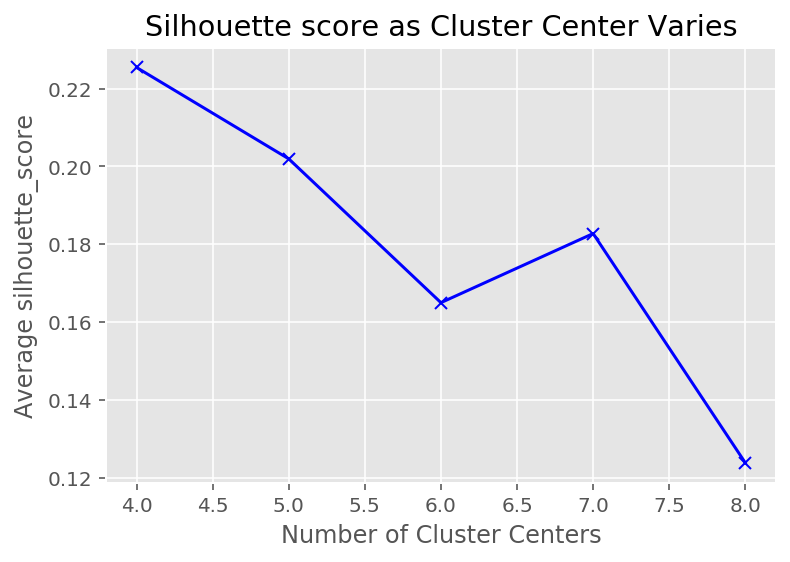

In [8]:
#  Silhouette is a technique in clustering that validates the best cluster groups. 
score = []
K = range(4,9)
for k in K:
    kmeans = KMeans(n_clusters = k, random_state=50)
    kmeans.fit(X)
    labels = kmeans.labels_
    score.append(silhouette_score(X, labels))
plt.plot(K, score,'bx-')
plt.xlabel('Number of Cluster Centers')
plt.ylabel('Average silhouette_score')
plt.title('Silhouette score as Cluster Center Varies')
plt.show()     

### Step 3: Analyze the result
    Q Inspect the groups find out which customers are grouped together.
    Q Print out customer names that are in each segment.

In [9]:
best_k = 4
kmeans = KMeans(n_clusters=best_k, random_state=50).fit(X)
label = kmeans.labels_

cluster_map = pd.DataFrame()
cluster_map['customer'] = X.index
cluster_map['cluster'] = kmeans.labels_

for i in range(best_k):
    print("="*15 + "Cluster " + str(i) + "="*15)
    print(cluster_map[cluster_map["cluster"] == i]["customer"])
    print()

===============Cluster 0===============
1                  Ann Arbor Speed
2                  Austin Cruisers
8         Indianapolis Velocipedes
14            Miami Race Equipment
16              Nashville Cruisers
17         New Orleans Velocipedes
19    Oklahoma City Race Equipment
27          Seattle Race Equipment
Name: customer, dtype: object

===============Cluster 1===============
0         Albuquerque Cycles
5              Dallas Cycles
6           Denver Bike Shop
7             Detroit Cycles
10         Kansas City 29ers
12        Los Angeles Cycles
15     Minneapolis Bike Shop
18           New York Cycles
20    Philadelphia Bike Shop
21           Phoenix Bi-peds
23          Portland Bi-peds
24        Providence Bi-peds
25     San Antonio Bike Shop
Name: customer, dtype: object

===============Cluster 2===============
3              Cincinnati Speed
4       Columbus Race Equipment
11             Las Vegas Cycles
13    Louisville Race Equipment
26       San Francisco Cruisers
2

    Q Determine the preferences of the customer segments by inspecting factors related to the model (e.g. price point, category of bike, etc.)
    Q Then for each cluster, arrange top 10 bike models by cluster in descending order for the combination cluster centroids with bike models with feature inspection and print out this information.
    
According to the assumption: mountain bike vs. road bike and premium vs affordable preferences.    

**cluster0: affordable + road**
- The top 10 models purchased all but three has a affordable (low-price) and all has a road category. 6 out 10 have an Aluminum frame.   

**cluster1: affordable + mountain**
- The top 10 models purchased all but two has a affordable (low-price) and all but three has mountain category. The all but three models has an Aluminum frame.      

**cluster2: premium + road**
- The top 10 models purchased are predominantly high-price and road. The all but two models has a carbon frame.   

**cluster3: premium + mountain**
- The top 10 models purchased are predominantly high-price and mountain. The all but one model has a carbon frame.    
    

In [10]:
index = pd.MultiIndex.from_tuples(X.T.index, names=['model', 'category1', 'category2', 'frame', 'price'])
Preferenaces = pd.DataFrame(index= index)
Preferenaces = Preferenaces.reset_index()
lst = []
X1 = []
for i in range(best_k):
    idx = sorted(enumerate(kmeans.cluster_centers_[i]), key=operator.itemgetter(1),reverse = True)[:10]
    lst.append([idx[i][0] for i in range(len(idx))])
    X1.append([idx[i][1] for i in range(len(idx))])
    

for i in range(best_k):
    name = 'cluster' + str(i)
    print("="*20 + name + "="*20)

    name = Preferenaces.iloc[lst[i]]
    name['X1'] = X1[i]
    display(name)

====================cluster0====================


,model,category1,category2,frame,price,X1
80,Synapse Disc 105,Road,Endurance Road,Aluminum,Low,0.022197
87,Synapse Sora,Road,Endurance Road,Aluminum,Low,0.022186
82,Synapse Disc Tiagra,Road,Endurance Road,Aluminum,Low,0.022163
10,CAAD12 Red,Road,Elite Road,Aluminum,High,0.020347
70,Supersix Evo Ultegra 3,Road,Elite Road,Carbon,High,0.020335
11,CAAD12 Ultegra,Road,Elite Road,Aluminum,Low,0.020170
61,SuperX Ultegra,Road,Cyclocross,Carbon,Low,0.019623
15,CAAD8 Tiagra,Road,Elite Road,Aluminum,Low,0.019331
57,Slice Ultegra D12,Road,Triathalon,Carbon,High,0.019198
74,Synapse Carbon Disc 105,Road,Endurance Road,Carbon,Low,0.019167


====================cluster1====================


,model,category1,category2,frame,price,X1
8,CAAD12 Disc 105,Road,Elite Road,Aluminum,Low,0.017475
21,F-Si 2,Mountain,Cross Country Race,Aluminum,Low,0.017290
25,F-Si Carbon 4,Mountain,Cross Country Race,Carbon,Low,0.017116
92,Trail 5,Mountain,Sport,Aluminum,Low,0.016579
74,Synapse Carbon Disc 105,Road,Endurance Road,Carbon,Low,0.016347
96,Trigger Carbon 4,Mountain,Over Mountain,Carbon,High,0.015748
17,Catalyst 2,Mountain,Sport,Aluminum,Low,0.015255
6,CAAD12 105,Road,Elite Road,Aluminum,Low,0.015160
42,Scalpel 29 4,Mountain,Cross Country Race,Aluminum,High,0.015112
30,Habit 4,Mountain,Trail,Aluminum,Low,0.014998


====================cluster2====================


,model,category1,category2,frame,price,X1
55,Slice Hi-Mod Dura Ace D12,Road,Triathalon,Carbon,High,0.022944
10,CAAD12 Red,Road,Elite Road,Aluminum,High,0.022335
7,CAAD12 Black Inc,Road,Elite Road,Aluminum,High,0.021382
54,Slice Hi-Mod Black Inc.,Road,Triathalon,Carbon,High,0.021208
64,Supersix Evo Hi-Mod Dura Ace 1,Road,Elite Road,Carbon,High,0.020968
86,Synapse Hi-Mod Dura Ace,Road,Endurance Road,Carbon,High,0.020955
84,Synapse Hi-Mod Disc Red,Road,Endurance Road,Carbon,High,0.020750
63,Supersix Evo Black Inc.,Road,Elite Road,Carbon,High,0.020434
70,Supersix Evo Ultegra 3,Road,Elite Road,Carbon,High,0.019964
83,Synapse Hi-Mod Disc Black Inc.,Road,Endurance Road,Carbon,High,0.019664


====================cluster3====================


,model,category1,category2,frame,price,X1
45,Scalpel 29 Carbon Race,Mountain,Cross Country Race,Carbon,High,0.030823
34,Habit Carbon 2,Mountain,Trail,Carbon,High,0.028047
49,Scalpel-Si Carbon 3,Mountain,Cross Country Race,Carbon,High,0.027905
39,Jekyll Carbon 2,Mountain,Over Mountain,Carbon,High,0.026506
95,Trigger Carbon 3,Mountain,Over Mountain,Carbon,High,0.023688
96,Trigger Carbon 4,Mountain,Over Mountain,Carbon,High,0.023114
94,Trigger Carbon 2,Mountain,Over Mountain,Carbon,High,0.021636
0,Bad Habit 1,Mountain,Trail,Aluminum,High,0.021605
23,F-Si Black Inc.,Mountain,Cross Country Race,Carbon,High,0.021231
47,Scalpel-Si Black Inc.,Mountain,Cross Country Race,Carbon,High,0.020406


### Extra credit

#### Hierarchical clustering [link](https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/ )
    Q Compare the result to the use of k-means and note any differences.
   
    
- From the dendrograms, the cluster equals to 4 seems to be the best cluster number. 
- Compred to the results with Kmeans, all cluster assignment results are the exactly **SAME** for both clustering methods. This is great which means the cluster number 4 is great and our assumption is great.


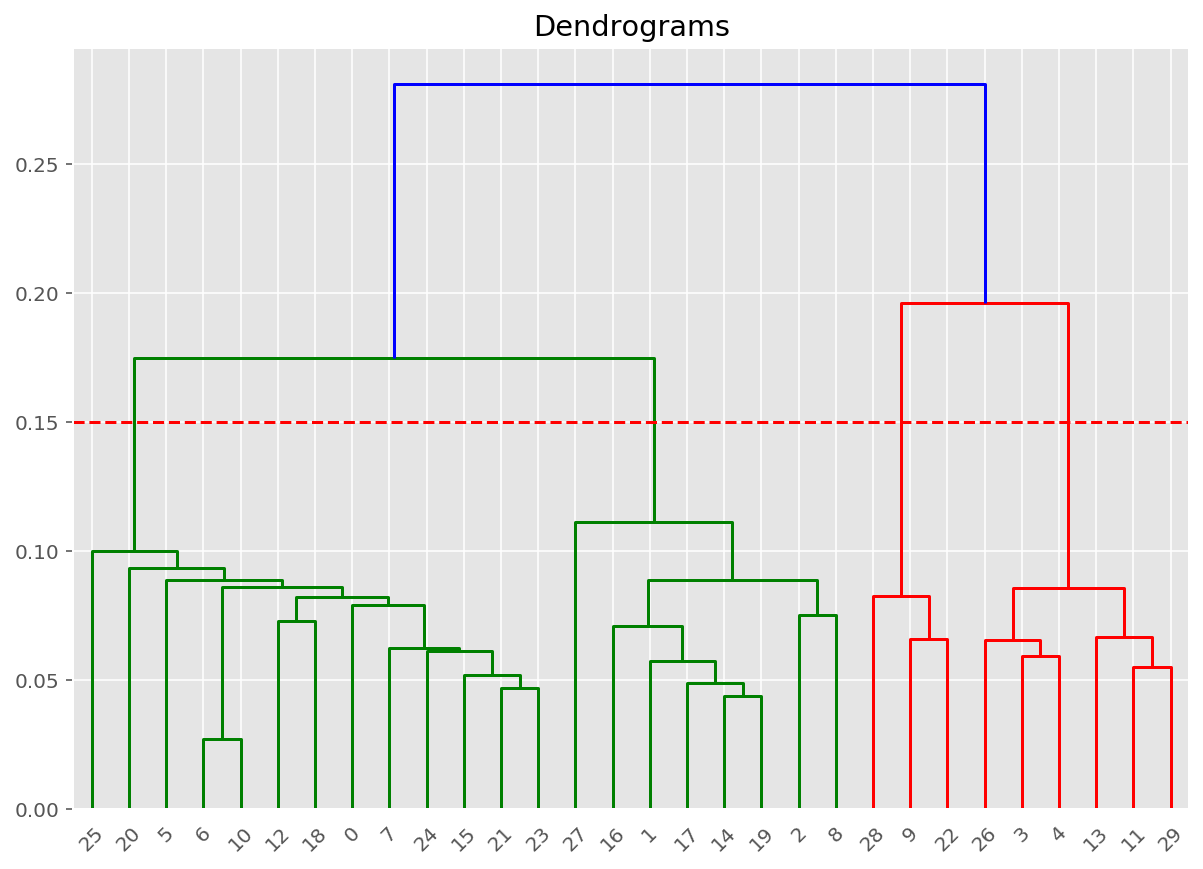

In [11]:
# The x-axis contains the samples and y-axis represents the distance between these samples. 
# The vertical line with maximum distance is the blue line and hence we can decide a threshold of 0.15 and cut the dendrogram:

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=0.15, color='r', linestyle='--')


In [12]:

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster_map1 = pd.DataFrame()
cluster_map1['customer'] = X.index
cluster_map1['cluster'] = cluster.fit_predict(X)

for i in range(best_k):
    print("="*15 + "Cluster " + str(i) + " Agglomerative Clustering "+"="*15  )
    print(cluster_map1[cluster_map1["cluster"] == i]["customer"])
    print("*"*60)
    print("="*15 + "Cluster " + str(i) +" Kmeans Clustering "+ "="*15)
    print(cluster_map[cluster_map["cluster"] == i]["customer"])
    print()

===============Cluster 0 Agglomerative Clustering ===============
1                  Ann Arbor Speed
2                  Austin Cruisers
8         Indianapolis Velocipedes
14            Miami Race Equipment
16              Nashville Cruisers
17         New Orleans Velocipedes
19    Oklahoma City Race Equipment
27          Seattle Race Equipment
Name: customer, dtype: object
************************************************************
===============Cluster 0 Kmeans Clustering ===============
1                  Ann Arbor Speed
2                  Austin Cruisers
8         Indianapolis Velocipedes
14            Miami Race Equipment
16              Nashville Cruisers
17         New Orleans Velocipedes
19    Oklahoma City Race Equipment
27          Seattle Race Equipment
Name: customer, dtype: object

===============Cluster 1 Agglomerative Clustering ===============
0         Albuquerque Cycles
5              Dallas Cycles
6           Denver Bike Shop
7             Detroit Cycles
10         